# **Task-3: Decision Tree**
In this task, we require a dataset, called 'Iris.csv'. It contains 4 features and 3 species, which is the label. I have used "DecisionTreeClassifier()" from scikit-learn and trained the model. Later plotted the tree!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [2]:
iris= datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [5]:
y = iris.target

In [6]:
x = iris_df.values

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# **data preparation**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [9]:
#defining thw swcision tree 
from sklearn.tree import DecisionTreeClassifier


In [10]:
trainer = DecisionTreeClassifier()


In [11]:
learner = trainer.fit(x_train,y_train)

In [12]:
y_pre = learner.predict(x_test)

In [13]:
pd.DataFrame({'predicted':y_pre, 'Actual': y_test}).head()

predicted  Actual
0          2       2
1          1       1
2          0       0
3          2       2
4          0       0

## **Accuracy of the model**

In [18]:
#importing libaries for accuracy calculation
from sklearn.metrics import accuracy_score, jaccard_similarity_score
acc= accuracy_score(y_pre, y_test)
jac = jaccard_similarity_score(y_pre,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [15]:
print('accuray score = {}, /n jaccard similarity score ={}'.format(acc, jac))

accuray score = 0.9736842105263158, /n jaccard similarity score =0.9736842105263158


**Visualize the Decision Tree**


In [16]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


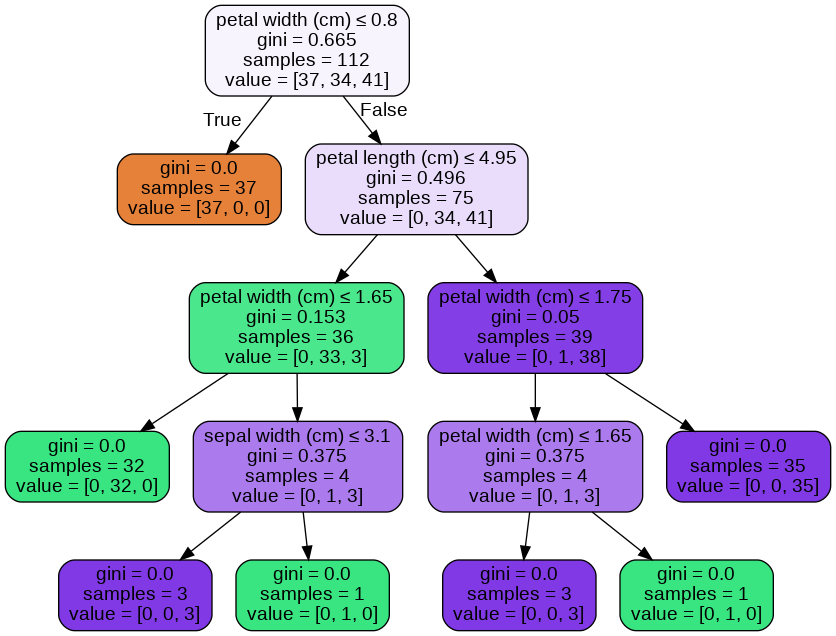

In [17]:
dot_data = StringIO()
export_graphviz(learner, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph  = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())